In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# df = pd.read_csv("hf://datasets/criteo/FairJob/fairjob.csv.gz")abs
# df.to_csv("fairjob.csv", index=False)

df_unsplitted=pd.read_csv('fairjob.csv');


In [3]:
df_unsplitted[df_unsplitted['click']==1]['click'].count()

7489

In [4]:
def stratified_split(df,categorical_col):
    np.random.seed(42)  
    
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()
    val_data = pd.DataFrame()

    for category in df[categorical_col].unique():
        category_data = df[df[categorical_col] == category]
        shuffled = category_data.sample(frac=1).reset_index(drop=True)  

        total = len(shuffled)
        train_end = int(total * 0.9)
        test_end = int(total * 0.95)

        train_data = pd.concat([train_data, shuffled.iloc[:train_end]])
        test_data = pd.concat([test_data, shuffled.iloc[train_end:test_end]])
        val_data = pd.concat([val_data, shuffled.iloc[test_end:]])

    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)
    val_data.reset_index(drop=True, inplace=True)

    return train_data, test_data, val_data



In [5]:
df, test_df, val_df = stratified_split(df_unsplitted,'click')

In [6]:
df

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
0,0,0,1,0,1,13533,73347,38418,8,8,...,-0.333033,-0.542801,0.090920,-0.513946,1.227222,0.477076,-0.321850,-0.577173,-0.264359,-0.478148
1,0,0,0,0,8,18410,174741,58514,6,6,...,-0.333033,-0.542801,-0.152823,0.316978,0.230748,0.027432,-0.345480,0.257664,-0.264359,0.402966
2,0,1,1,0,3,5390,234270,14300,7,7,...,-0.333033,-0.542801,0.398806,-0.003491,-0.523668,-0.445701,-0.345480,-0.577173,1.279939,-0.996450
3,0,0,0,0,1,8424,135,13451,4,4,...,-0.333033,-0.542801,-0.319594,-0.837161,-0.494652,-0.377998,-0.113921,-0.577173,-0.264359,-0.789129
4,0,0,1,0,1,4459,184538,36289,7,7,...,-0.333033,-0.542801,0.062056,-0.686621,-0.262524,-0.524096,-0.325088,-0.577173,-0.264359,-0.633638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964998,1,1,1,0,13,24384,159227,59414,8,8,...,-0.333033,-0.542801,-0.297144,0.470473,0.259764,-0.217238,0.303507,0.257664,-0.264359,0.558457
964999,1,0,1,1,3,16827,211383,7135,8,8,...,-0.333033,-0.542801,-0.361287,-0.937521,-0.523668,-0.761985,0.166160,-0.577173,-0.264359,-0.892789
965000,1,0,1,0,1,4021,126082,31448,5,5,...,-0.333033,-0.542801,-0.383737,-0.987701,-0.494652,-0.744993,-0.067343,-0.577173,-0.264359,-0.944620
965001,1,0,0,0,1,28087,210189,33985,3,3,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,-0.264359,-0.996450


In [7]:
df[df['click']==1]['click'].count()

6740

In [8]:
df[df['click']==1]['rank'].max()

26

In [9]:
df.describe()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
count,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,...,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000,965003.000000
mean,0.006984,0.499825,0.665513,0.098661,6.171291,15992.526936,131994.784989,30645.276168,6.375110,6.715405,...,-0.002506,-0.000241,-0.010685,-0.020867,0.004242,0.000594,0.001492,-0.012045,-0.001420,-0.021775
std,0.083281,0.500000,0.471811,0.298206,4.751058,9186.818149,64763.092642,17723.588008,2.169411,1.772736,...,0.979787,1.001002,0.993905,0.989217,1.026395,1.017179,1.010200,0.980746,0.999748,0.987541
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,-0.264359,-0.996450
25%,0.000000,0.000000,0.000000,0.000000,2.000000,8018.000000,78632.500000,14847.500000,6.000000,6.000000,...,-0.333033,-0.542801,-0.393358,-0.837161,-0.494652,-0.620256,-0.345480,-0.577173,-0.264359,-0.840959
50%,0.000000,0.000000,1.000000,0.000000,5.000000,16106.000000,130137.000000,30737.000000,7.000000,8.000000,...,-0.333033,-0.542801,-0.354873,-0.383469,-0.349572,-0.303199,-0.345480,-0.577173,-0.264359,-0.374487
75%,0.000000,1.000000,1.000000,0.000000,9.000000,24075.000000,188732.000000,45739.500000,8.000000,8.000000,...,-0.050435,0.925347,-0.046987,0.567878,0.085668,0.238267,-0.067343,0.257664,-0.264359,0.558457
max,1.000000,1.000000,1.000000,1.000000,40.000000,31879.000000,246360.000000,62153.000000,8.000000,8.000000,...,40.361096,12.324090,19.782770,14.297500,32.738320,20.520984,22.334339,18.574885,23.672271,14.811769


In [10]:
n = df.shape[0]
n

965003

In [11]:
df.duplicated().sum()

0

All the rows are unique

In [12]:
print("Unique user_id:", df['user_id'].nunique())
print("Unique product_id:", df['product_id'].nunique())
print("Unique impression_id:", df['impression_id'].nunique())

Unique user_id: 29823
Unique product_id: 55845
Unique impression_id: 218278


In [13]:
df.groupby(['user_id', 'product_id']).ngroups

522010

In [14]:
df.groupby(['user_id', 'impression_id']).ngroups

218278

In [15]:
x = df.groupby(['product_id', 'impression_id']).ngroups
x

958556

In [16]:
df.groupby(['product_id', 'impression_id','user_id']).ngroups

958556

In [17]:
print(f"only {n-x} rows have repeated combination for these 2 features")

only 6447 rows have repeated combination for these 2 features


##### 'product_id' and 'impression_id' can be primary key


In [18]:
key_counts = df.groupby(['product_id', 'impression_id']).size()

repeated_keys = key_counts[key_counts > 1]

print(repeated_keys)

product_id  impression_id
26          41016            2
43          164307           2
            164377           2
            170000           2
68          196307           2
                            ..
62067       206413           2
            206666           2
            210310           2
            210334           2
62119       219310           2
Length: 6447, dtype: int64


In [19]:
total_repeated_rows = repeated_keys.sum()

print(f"Total number of rows with repeated keys: {total_repeated_rows}")

Total number of rows with repeated keys: 12894


In [20]:
df.columns

Index(['click', 'protected_attribute', 'senior', 'displayrandom', 'rank',
       'user_id', 'impression_id', 'product_id', 'cat0', 'cat1', 'cat2',
       'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
       'cat11', 'cat12', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21',
       'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29',
       'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37',
       'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45',
       'num46', 'num47', 'num48', 'num49', 'num50'],
      dtype='object')

### Features
- **user_id** is a unique identifier assigned to each user. This identifier has been anonymized and does not contain any information related to the real users.
- **product_id** is a unique identifier assigned to each product, i.e. job offer.
- **impression_id** is a unique identifier assigned to each impression, i.e. online session that can have several products at the same time.
- **cat0** to **cat5** are anonymized categorical user features.
- **cat6** to **cat12** are anonymized categorical product features.
- **num13** to **num47** are anonymized numerical user features.

### Labels
 - **protected_attribute** is a binary feature that describes user gender proxy, i.e. female is 0, male is 1. The detailed description on the meaning can be found below.
- **senior** is a binary feature that describes the seniority of the job position, i.e. an assistant role is 0, a managerial role is 1. This feature was created during data processing step from the product title feature: if the product title contains words describing managerial role (e.g. 'president', 'ceo', and others), it is assigned to 1, otherwise to 0.
- **rank** is a numerical feature that corresponds to the positional rank of the product on the display for given impression_id. Usually, the position on the display creates the bias with respect to the click: lower rank means higher position of the product on the display.
- **displayrandom** is a binary feature that equals 1 if the display position on the banner of the products associated with the same impression_id was randomized. The click-rank metric should be computed on displayrandom = 1 to avoid positional bias.
- **click** is a binary feature that equals 1 if the product product_id in the impression impression_id was clicked by the user user_id.

In [21]:
rank_counts = df[df['click'] == 1]['rank'].value_counts().sort_index()
print(rank_counts)


rank
1     2766
2      781
3      672
4      577
5      447
6      300
7      283
8      281
9      134
10     103
11      70
12      72
13      75
14      49
15      44
16      19
17      28
18      28
19       6
20       3
21       1
26       1
Name: count, dtype: int64


clearly higher rank position has high click rate

**And below rank 26 there was never a click seen**

In [22]:
numerical_features = [f'num{i}' for i in range(16, 51)]

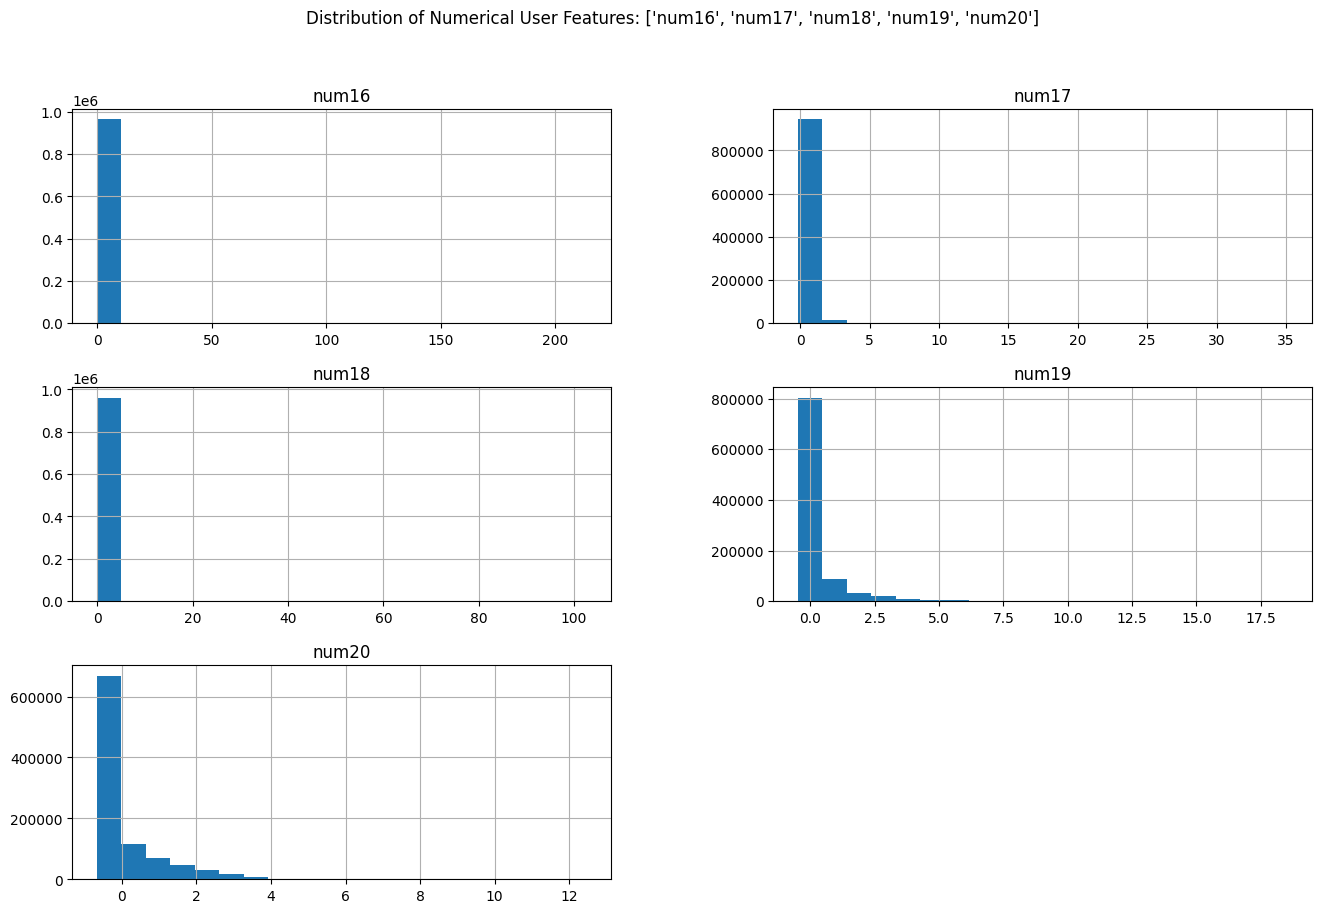

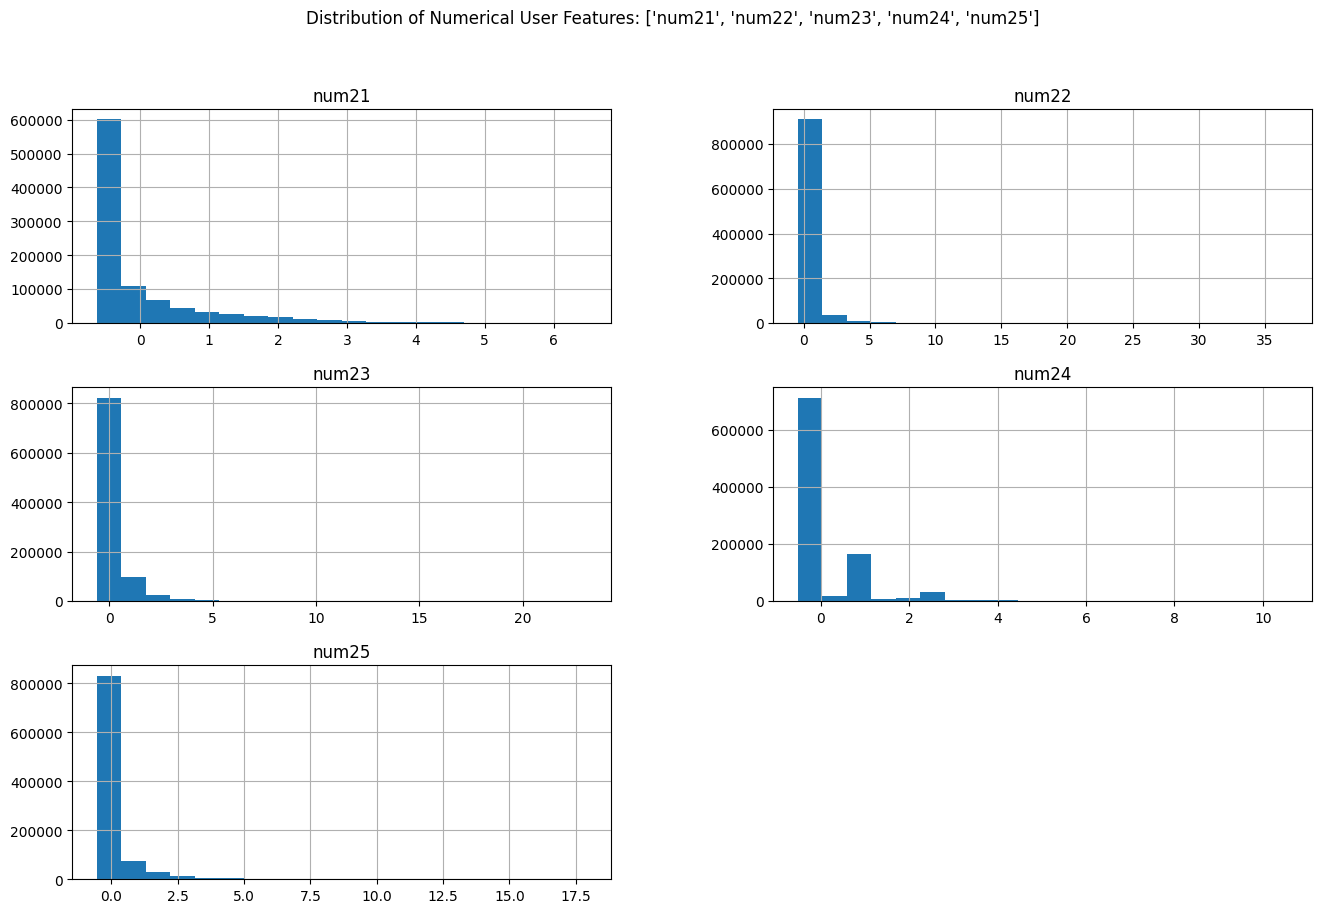

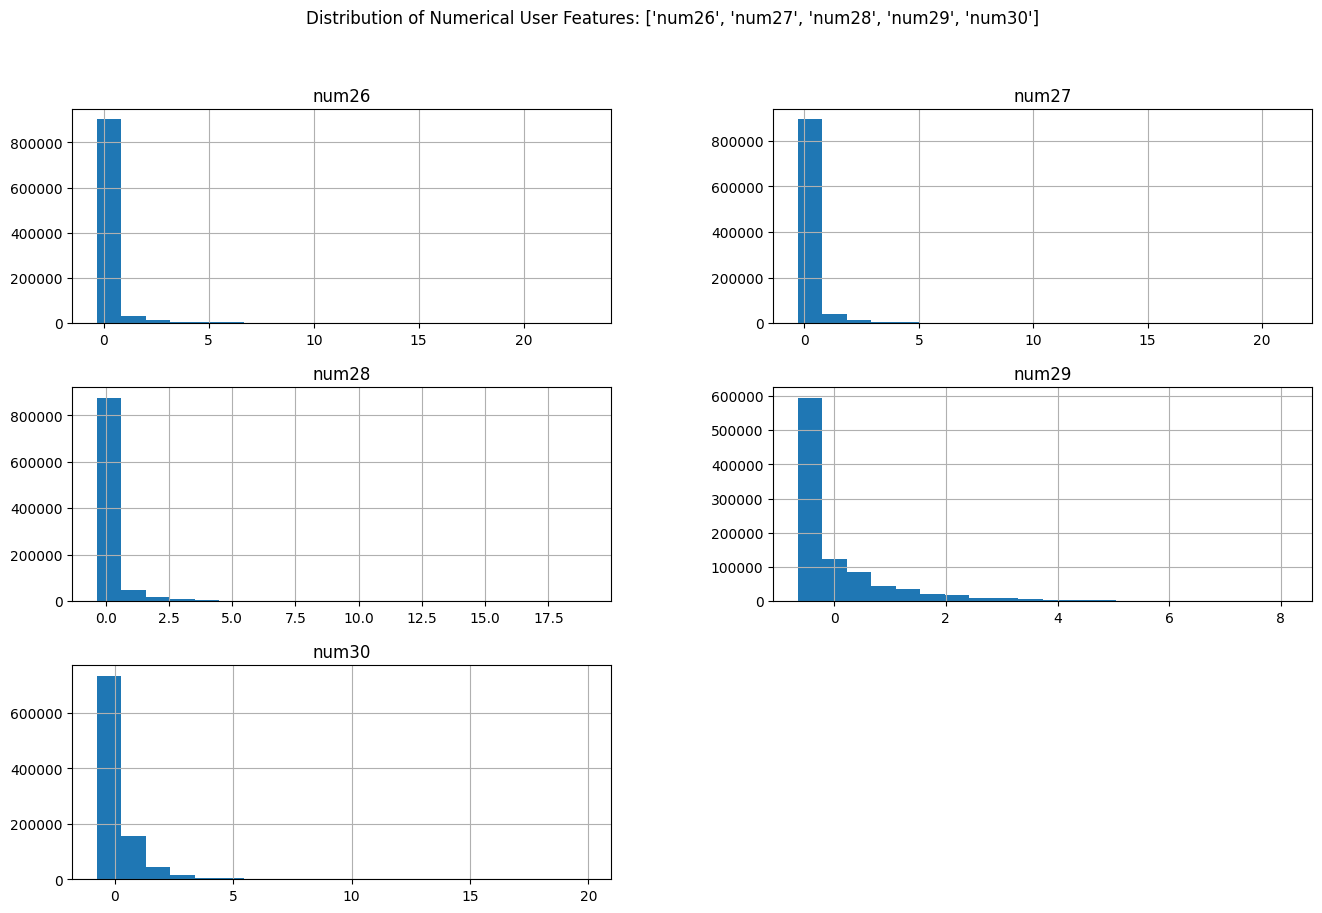

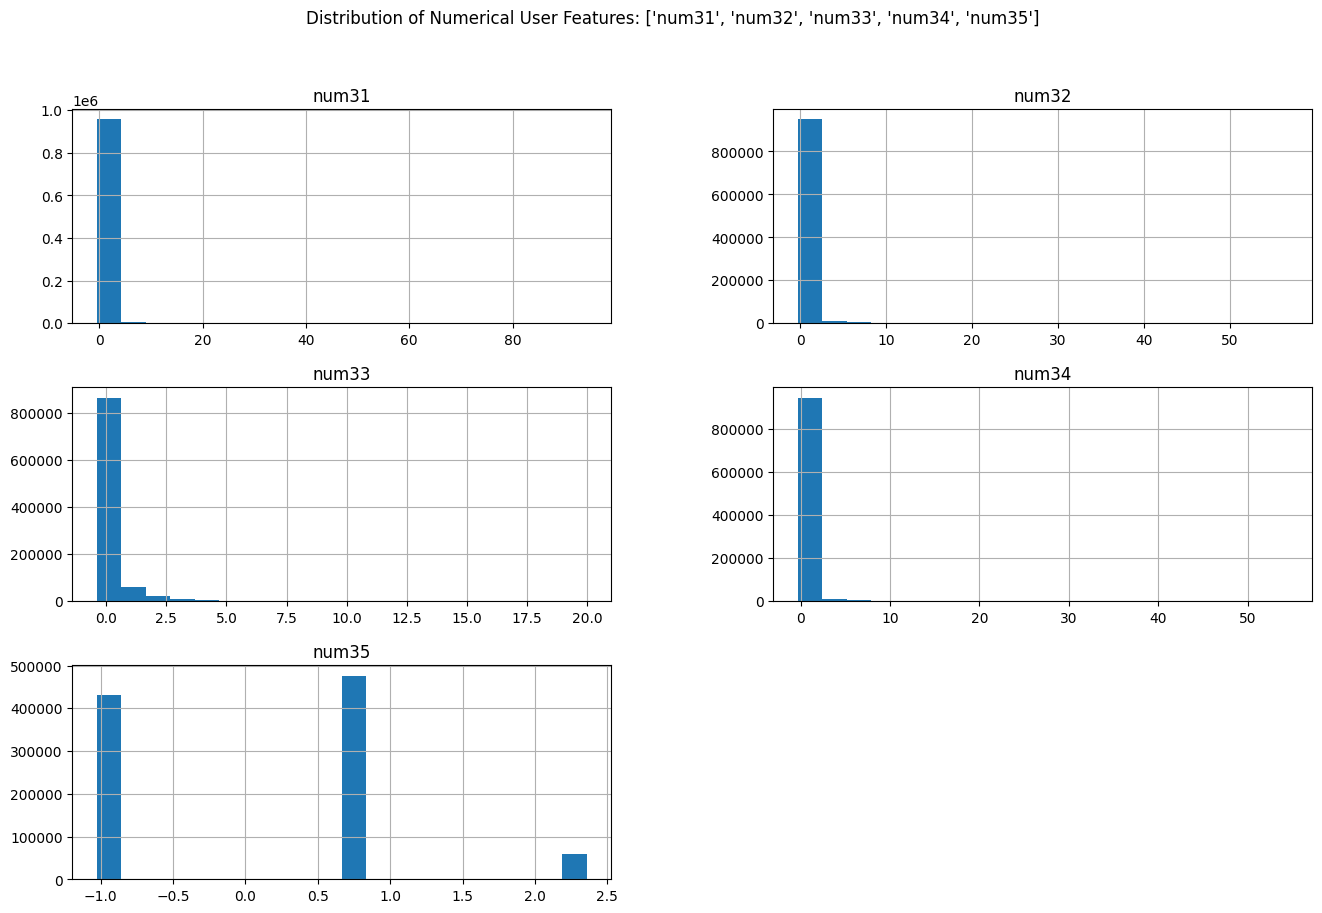

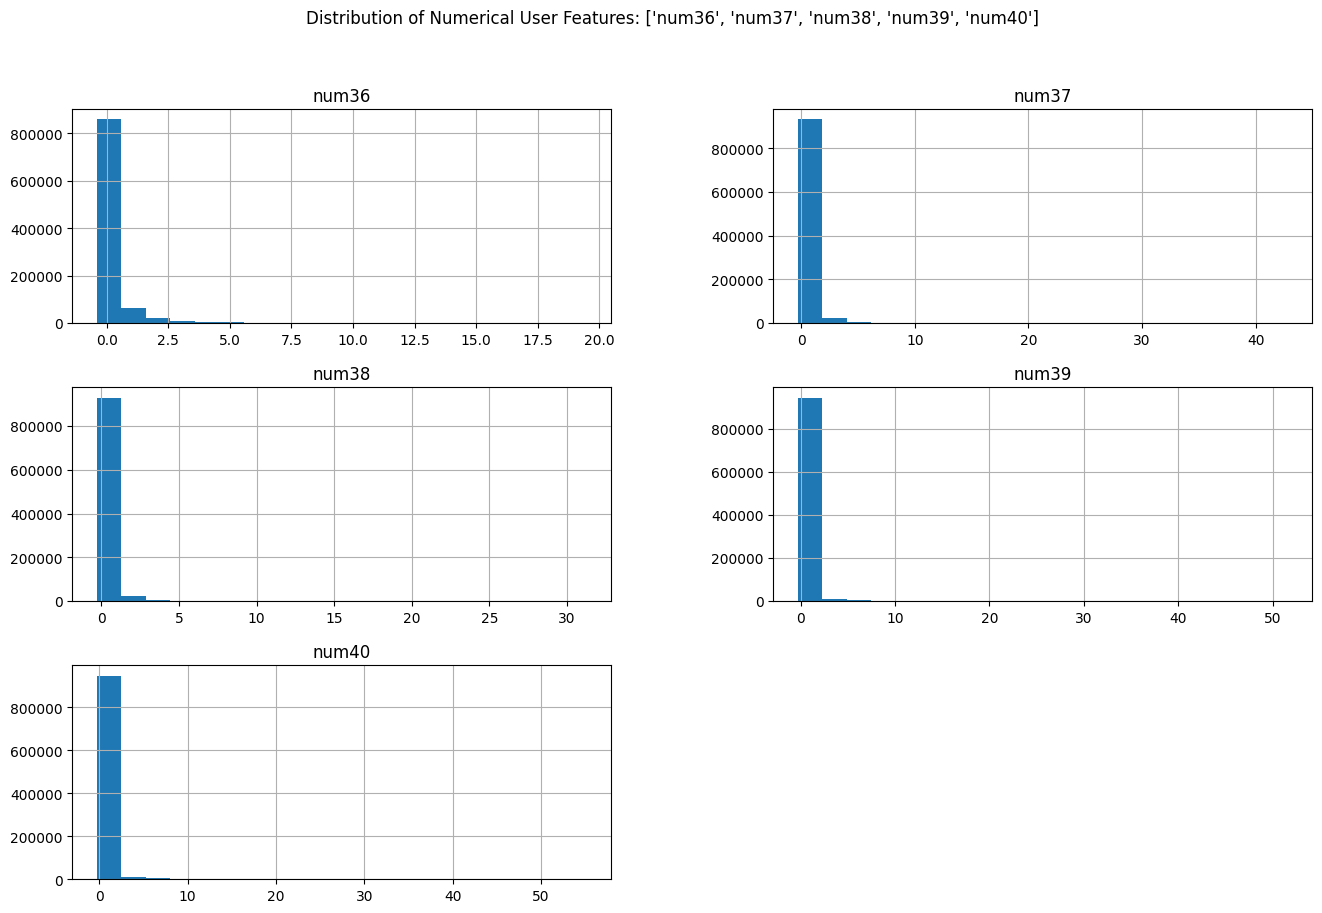

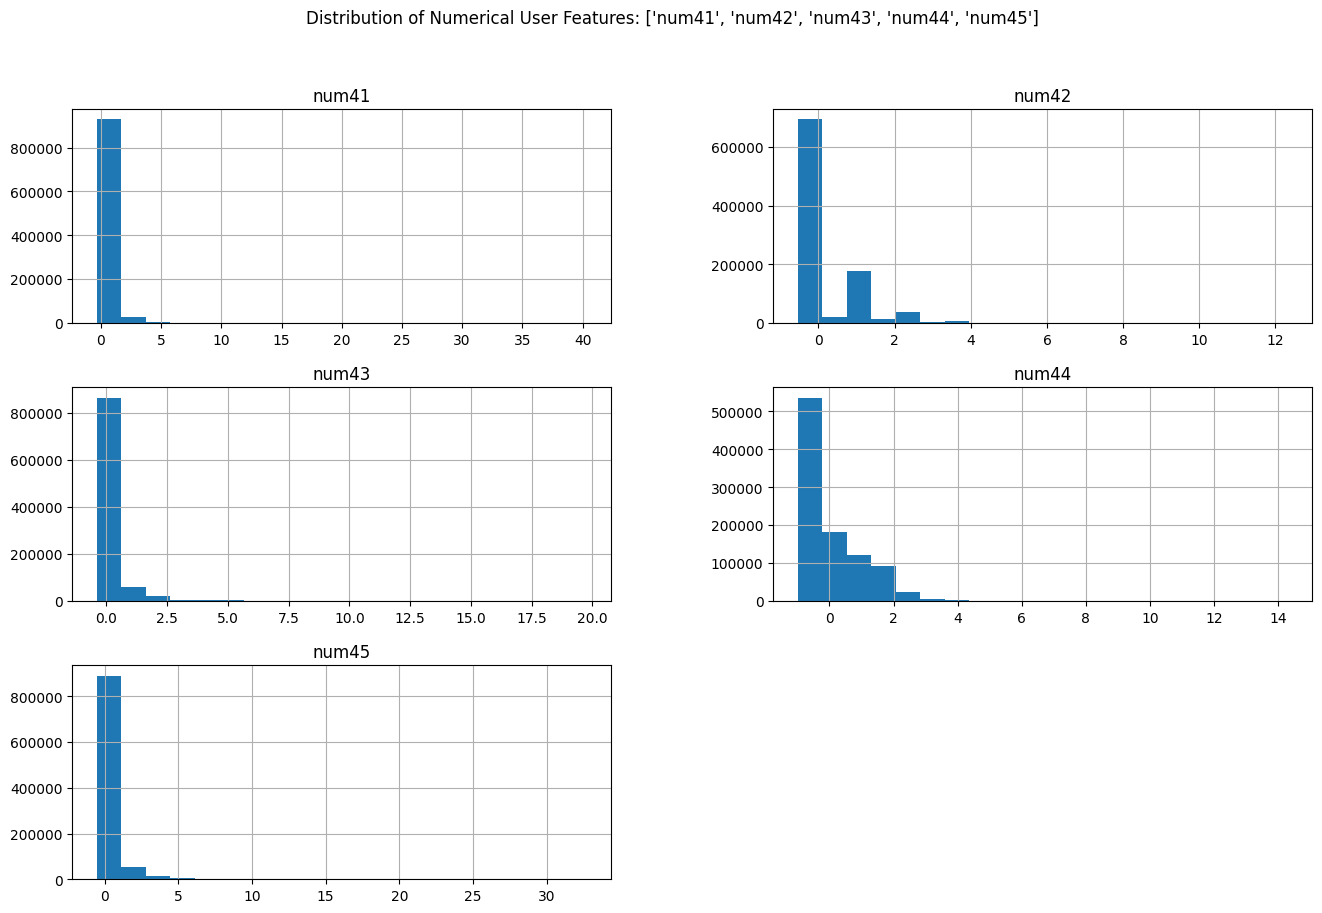

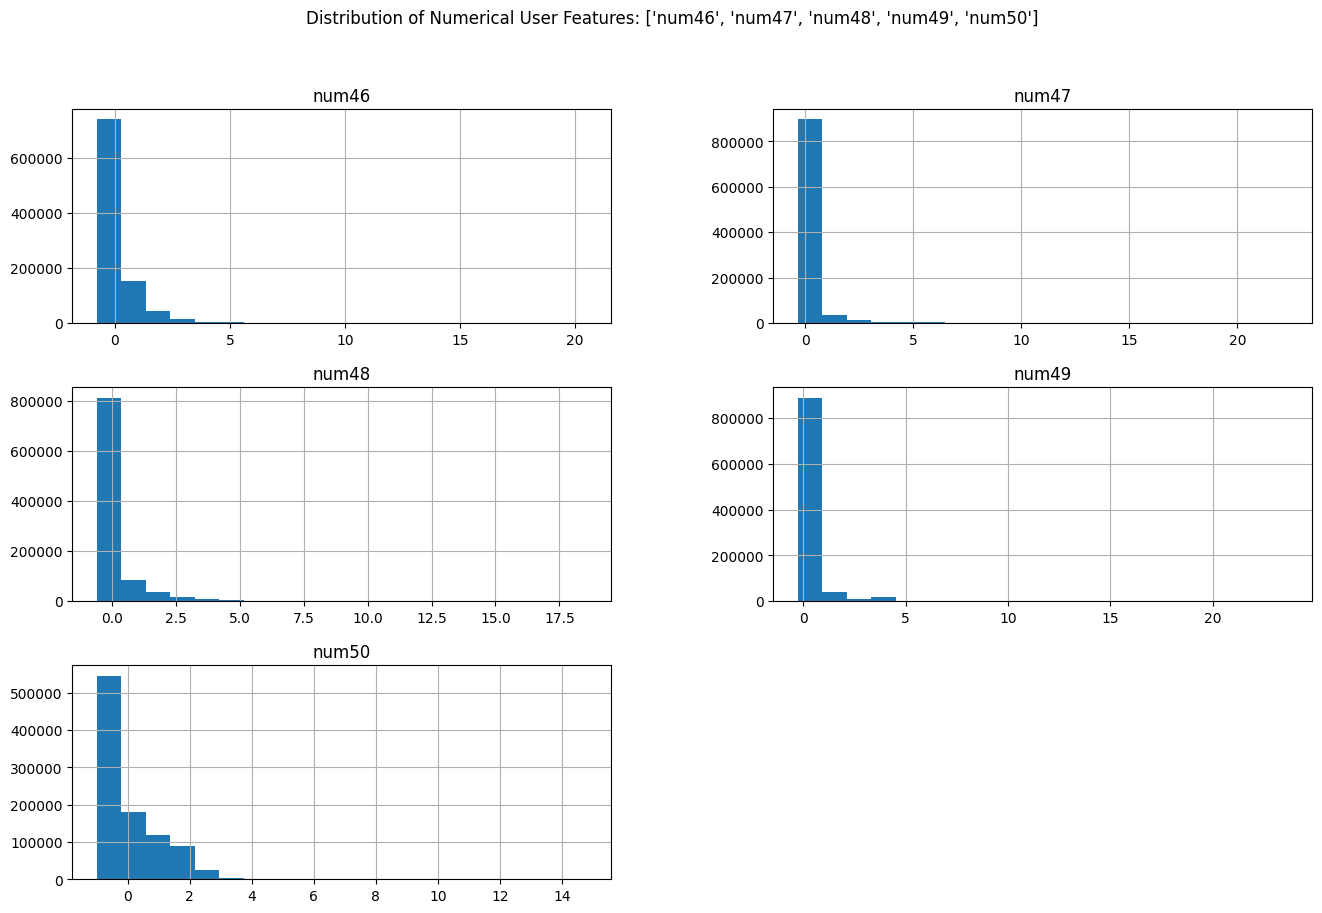

In [23]:
for i in range(0, len(numerical_features), 5):
    cols = numerical_features[i:i+5]
    
    df[cols].hist(bins=20, figsize=(16, 10))
    plt.suptitle(f"Distribution of Numerical User Features: {cols}")
    plt.show()

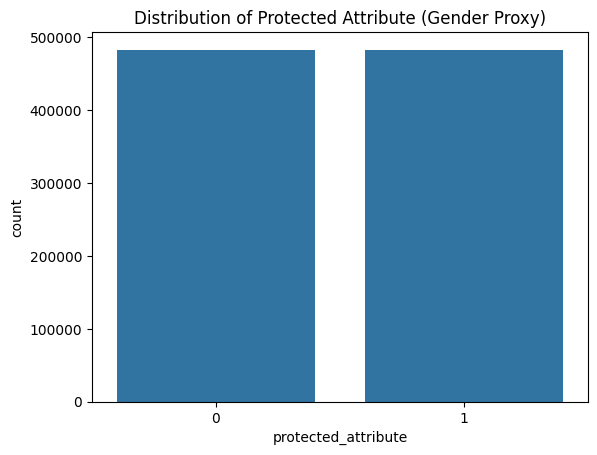

In [24]:
sns.countplot(data=df, x='protected_attribute')
plt.title("Distribution of Protected Attribute (Gender Proxy)")
plt.show()

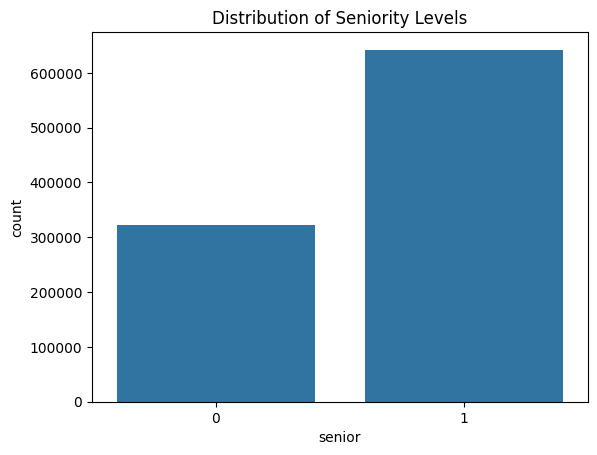

In [25]:
sns.countplot(data=df, x='senior')
plt.title("Distribution of Seniority Levels")
plt.show()

In [26]:
df[df['rank']<=5]['click'].count()/x

0.5490237398753959

More than 50% of times the product is displayed at a rank<=5

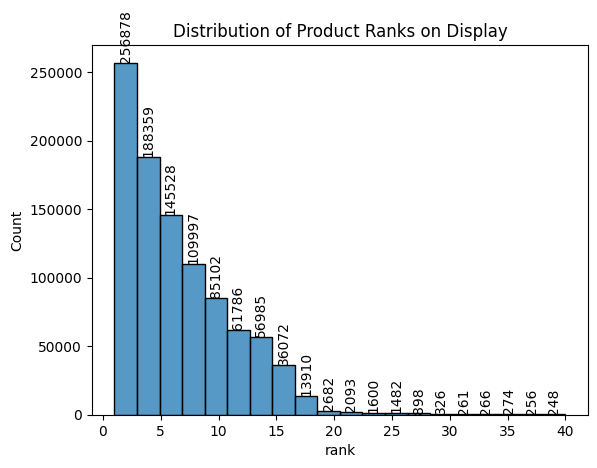

In [27]:
ax = sns.histplot(data=df, x='rank', bins=20)
plt.title("Distribution of Product Ranks on Display")
ax.bar_label(ax.containers[0],rotation=90)
plt.show()

In [28]:
df['rank'].describe()

count    965003.000000
mean          6.171291
std           4.751058
min           1.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          40.000000
Name: rank, dtype: float64

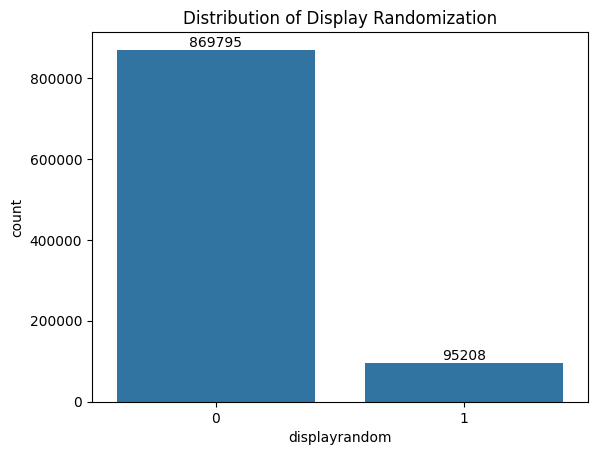

In [29]:
ax = sns.countplot(data=df, x='displayrandom')
plt.title("Distribution of Display Randomization")
ax.bar_label(ax.containers[0])
plt.show()

In [30]:
df[df['displayrandom']==1]['click'].count()/x

0.09932440045234707

almost 10% of times the display is random

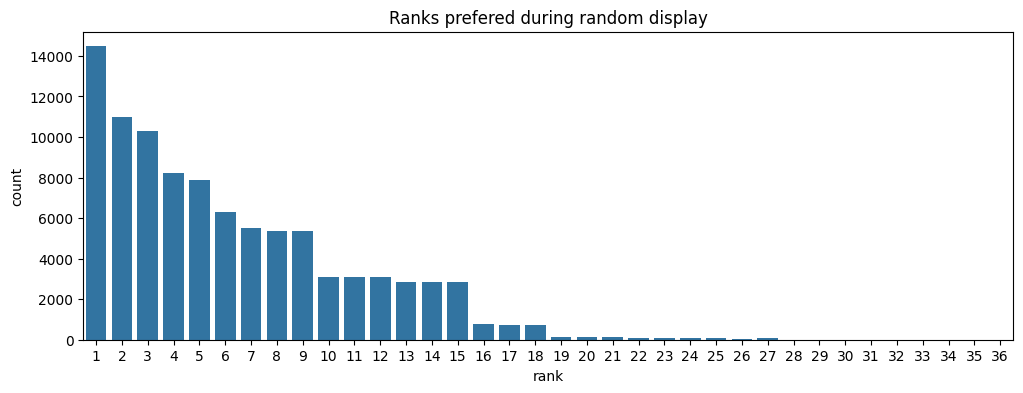

In [31]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df[df['displayrandom']==1], x='rank')
plt.title("Ranks prefered during random display")

plt.show()

In [32]:
df[df['displayrandom']==1]['rank'].describe()

count    95208.000000
mean         6.142908
std          4.627516
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         36.000000
Name: rank, dtype: float64

### Displayrandom

#### Conclusions :
- when an ad is displayed randomly, more than 50% of times it is displayed at a rank <=5

### Feature vs Click relations


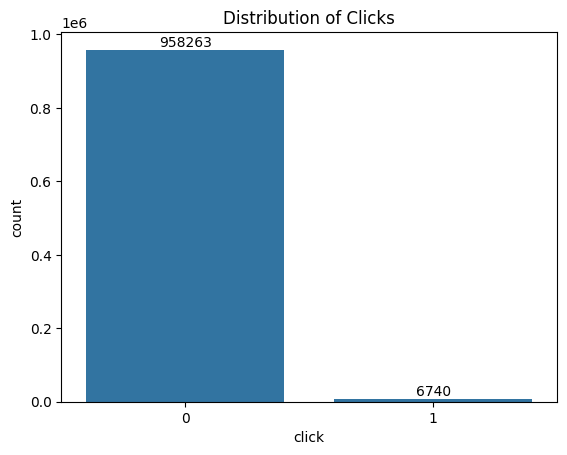

In [33]:
ax = sns.countplot(data=df, x='click')
plt.title("Distribution of Clicks")
ax.bar_label(ax.containers[0])
plt.show()

In [34]:
print(f"only {df[df['click']==1]['click'].count()/x*100} % products are clicked")

only 0.7031409745492179 % products are clicked


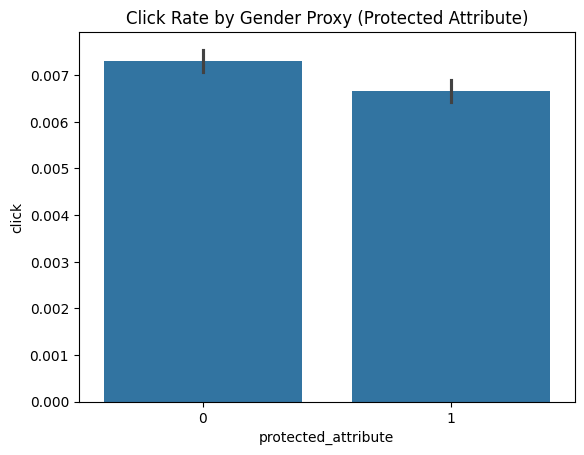

In [35]:
sns.barplot(data=df, x='protected_attribute', y='click')
plt.title("Click Rate by Gender Proxy (Protected Attribute)")
plt.show()

### Conclusion:
- Females click more often then males

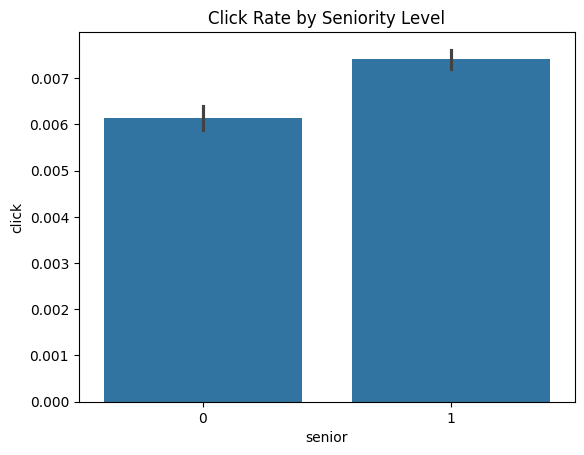

In [36]:
sns.barplot(data=df, x='senior', y='click')
plt.title("Click Rate by Seniority Level")
plt.show()

### Conclusion:
- Jobs with Managerial roles get more clicks than Assistant roles

In [37]:
rank_counts = df[df['click'] == 1]['rank'].value_counts().sort_index()
print(rank_counts)

rank
1     2766
2      781
3      672
4      577
5      447
6      300
7      283
8      281
9      134
10     103
11      70
12      72
13      75
14      49
15      44
16      19
17      28
18      28
19       6
20       3
21       1
26       1
Name: count, dtype: int64


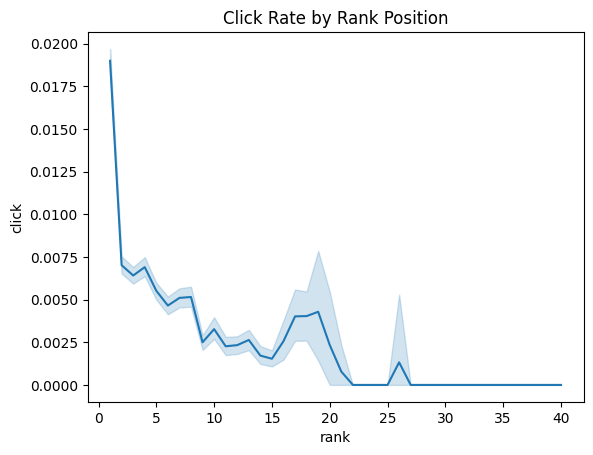

In [38]:
sns.lineplot(data=df, x='rank', y='click')
plt.title("Click Rate by Rank Position")
plt.show()

#### Conclusions:

- that spike after 25 is on rank 26, there is 1 click on rank 26
- click rate is high in between 15 to 20


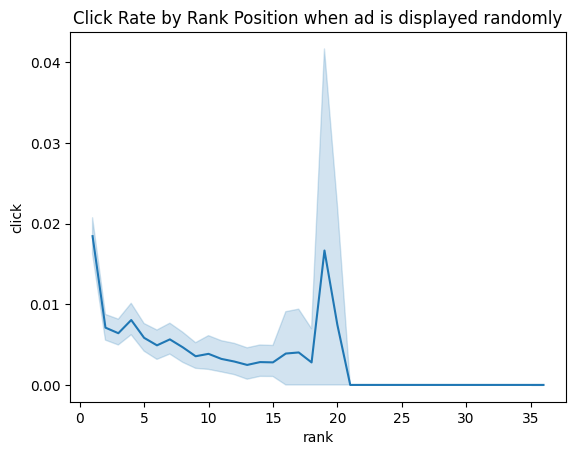

In [39]:
sns.lineplot(data=df[df['displayrandom']==1], x='rank', y='click')
plt.title("Click Rate by Rank Position when ad is displayed randomly")
plt.show()

- click rate at ranks 18,19 is almost equal to click rate at 1 when display is random

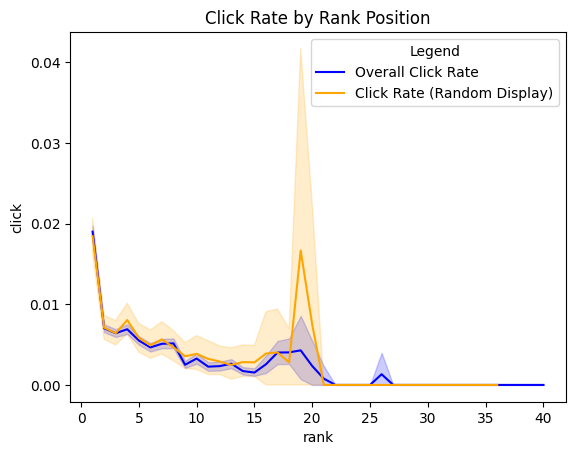

In [40]:
sns.lineplot(data=df, x='rank', y='click', label="Overall Click Rate", color="blue")

sns.lineplot(data=df[df['displayrandom'] == 1], x='rank', y='click', 
             label="Click Rate (Random Display)", color="orange")

plt.title("Click Rate by Rank Position")
plt.legend(title="Legend")
plt.show()


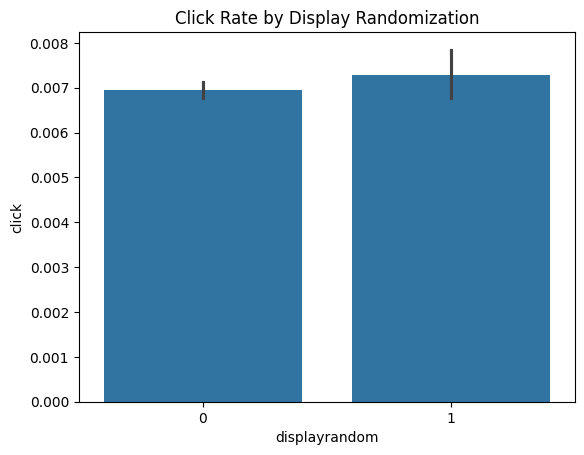

In [41]:
sns.barplot(data=df, x='displayrandom', y='click')
plt.title("Click Rate by Display Randomization")
plt.show()

- when ad is displayed randomly there is bit high chance of it getting clicked

## Categorical user features

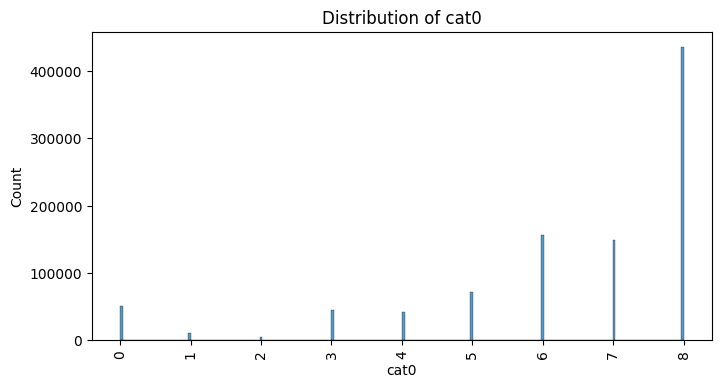

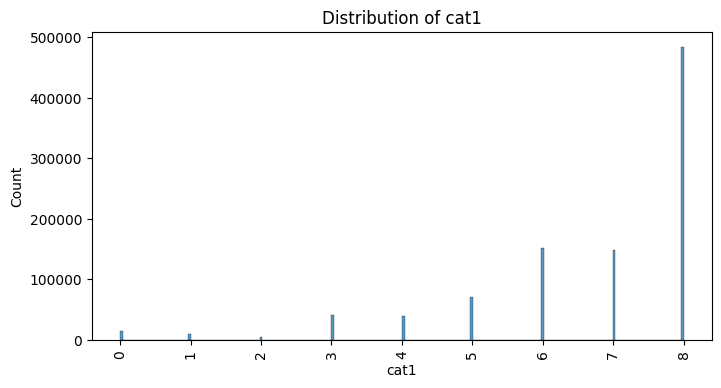

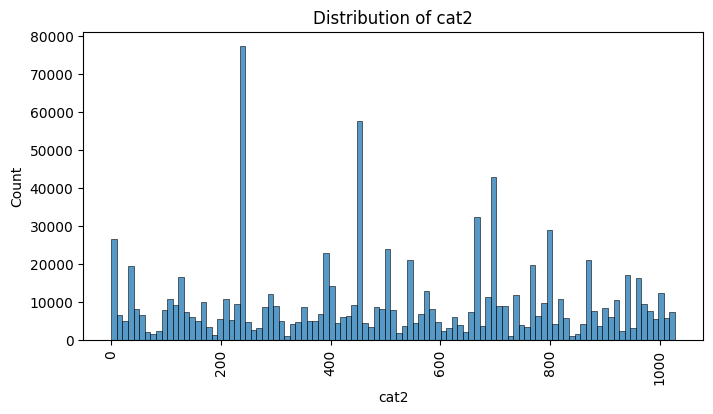

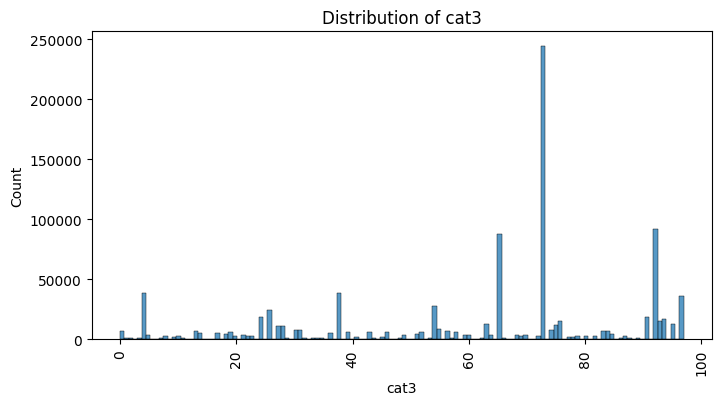

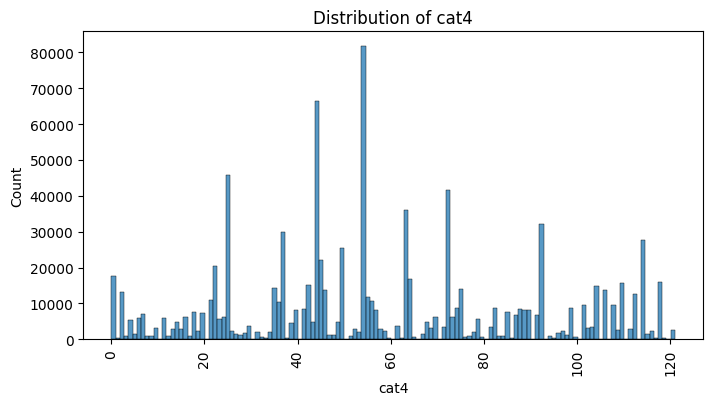

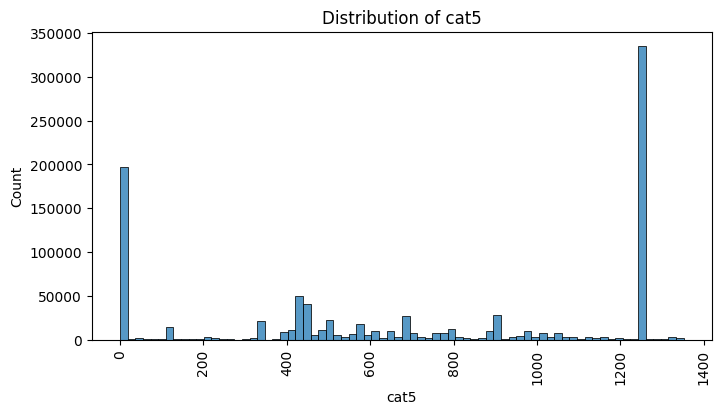

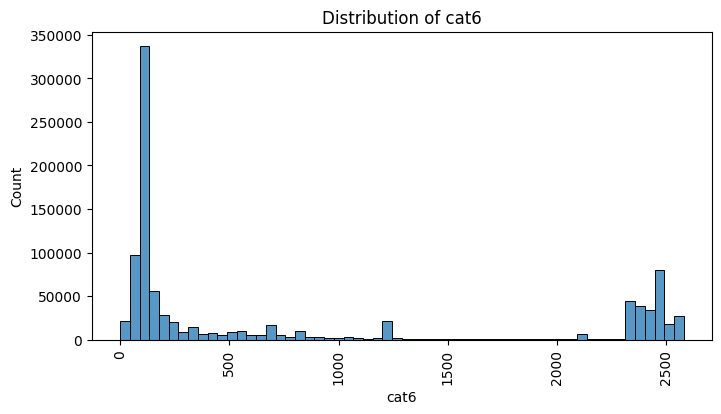

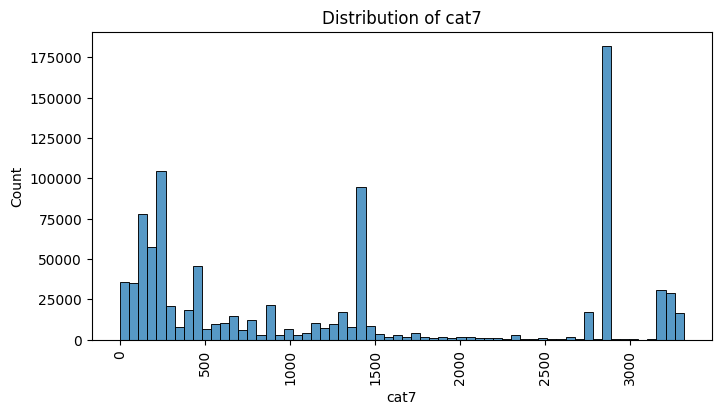

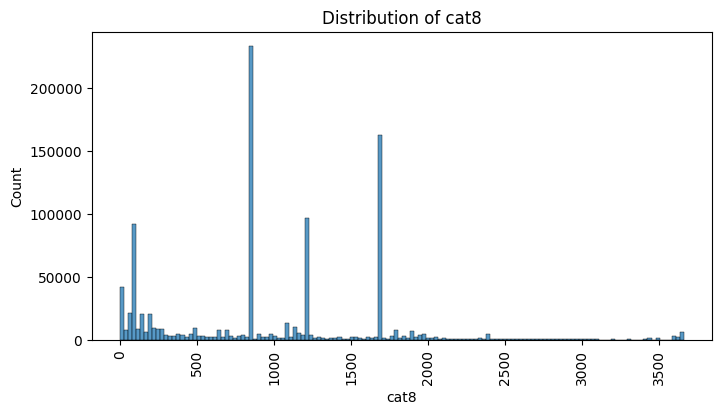

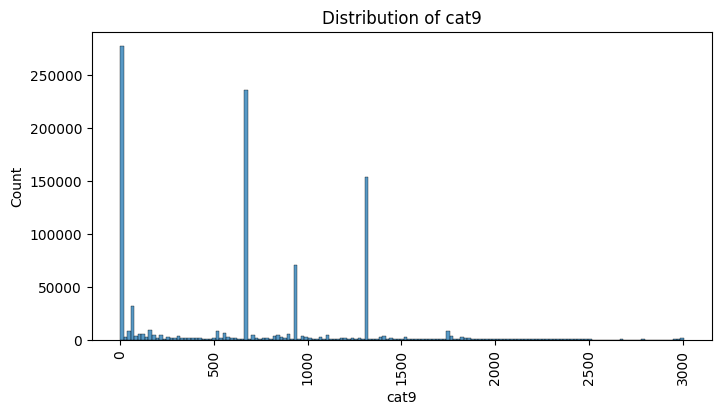

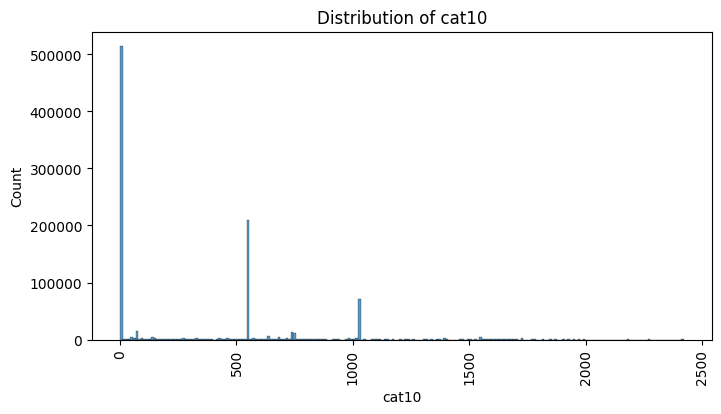

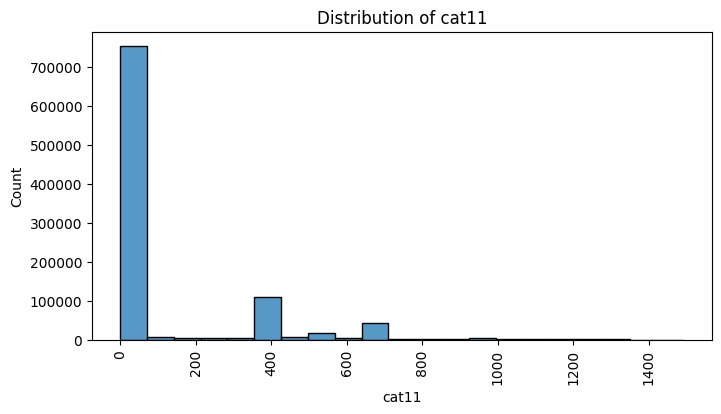

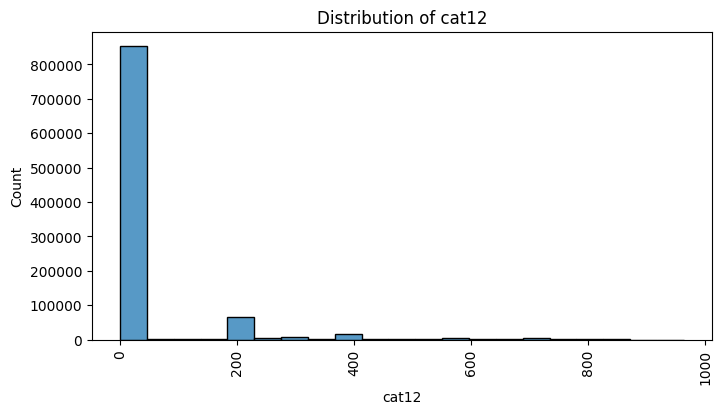

In [42]:
categorical_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [43]:
for col in categorical_features:
    print(f"No. of categories in {col}: ",df[col].nunique())

No. of categories in cat0:  9
No. of categories in cat1:  9
No. of categories in cat2:  1021
No. of categories in cat3:  98
No. of categories in cat4:  122
No. of categories in cat5:  1282
No. of categories in cat6:  2463
No. of categories in cat7:  3149
No. of categories in cat8:  3491
No. of categories in cat9:  2830
No. of categories in cat10:  2280
No. of categories in cat11:  1412
No. of categories in cat12:  899


In [44]:
corr_matrix = df[numerical_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly correlated features:", high_corr_features)

Highly correlated features: ['num34', 'num36', 'num39', 'num40', 'num41', 'num42', 'num43', 'num46', 'num47', 'num48', 'num50']


In [45]:
cat_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
cat_corr_matrix = df[cat_features].corr().abs()
upper_triangle_cat = cat_corr_matrix.where(np.triu(np.ones(cat_corr_matrix.shape), k=1).astype(bool))
high_corr_cat_features = [column for column in upper_triangle_cat.columns if any(upper_triangle_cat[column] > 0.5)]
print("Highly correlated categorical features:", high_corr_cat_features)

Highly correlated categorical features: ['cat1', 'cat11', 'cat12']


In [9]:
low_variance_features = [col for col in df.columns if df[col].var() < 0.9]
print("Low-variance features:", low_variance_features)

Low-variance features: ['click', 'protected_attribute', 'senior', 'displayrandom']


### More Analysis

In [12]:
new_df=df.groupby(['rank','protected_attribute','senior','displayrandom','click']).size().reset_index().rename(columns={0:'click_counts'})

In [7]:
new_df

,rank,protected_attribute,senior,displayrandom,click,click_counts
0,1,0,0,0,0,25473
1,1,0,0,0,1,514
2,1,0,0,1,0,2680
3,1,0,0,1,1,59
4,1,0,1,0,0,40420
...,...,...,...,...,...,...
425,39,1,1,0,0,29
426,40,0,0,0,0,40
427,40,0,1,0,0,22
428,40,1,0,0,0,24


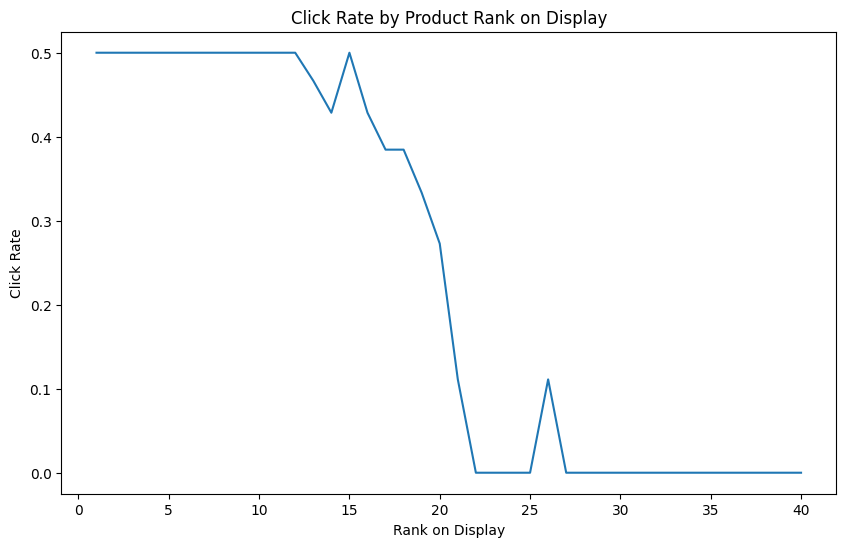

In [49]:
rank_click_rate = new_df.groupby('rank')['click'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=rank_click_rate, x='rank', y='click')
plt.title("Click Rate by Product Rank on Display")
plt.xlabel("Rank on Display")
plt.ylabel("Click Rate")
plt.show()

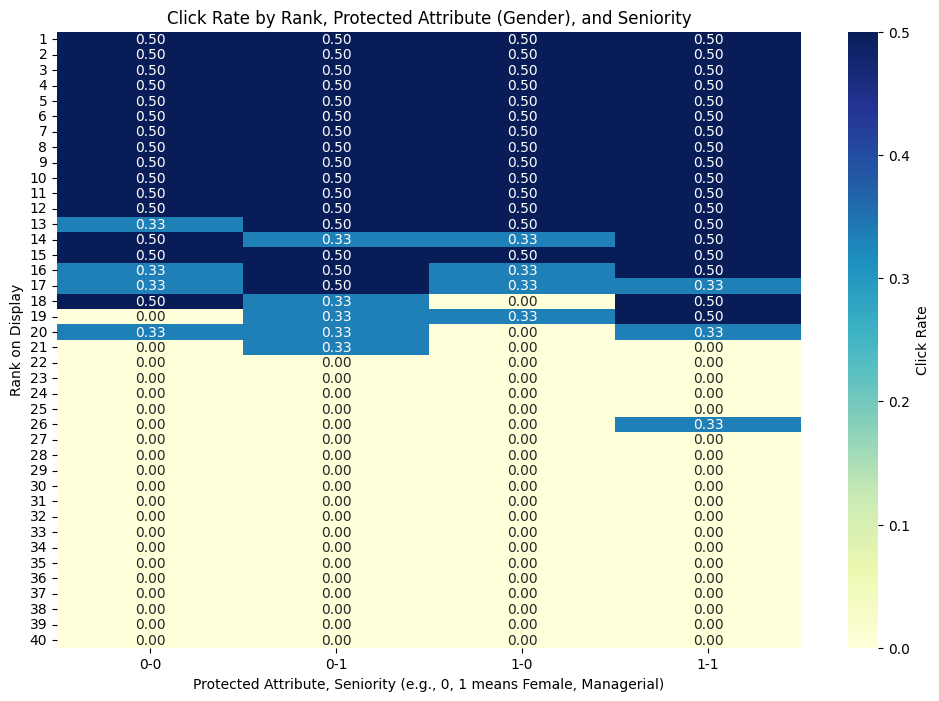

In [14]:
pivot_data = new_df.groupby(['rank', 'protected_attribute', 'senior'])['click'].mean().unstack(['protected_attribute', 'senior'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Click Rate'})
plt.title("Click Rate by Rank, Protected Attribute (Gender), and Seniority")
plt.xlabel("Protected Attribute, Seniority (e.g., 0, 1 means Female, Managerial)")
plt.ylabel("Rank on Display")
plt.show()

### Concusions

- Females are more likely to click on Assistant roles than Males
- Males are more likely to click on Managerial roles than Females

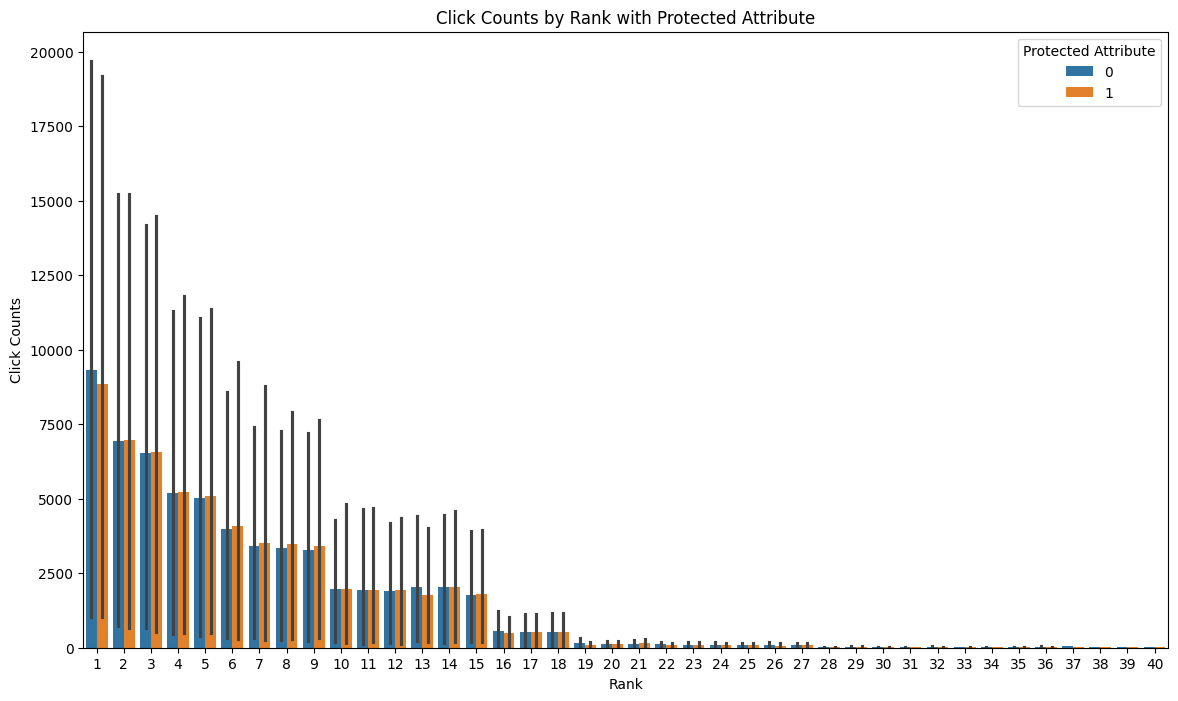

In [51]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='protected_attribute',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with Protected Attribute")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Protected Attribute', loc='upper right')

plt.show()

- Both genders are highly likely to click on lower ranked Ads

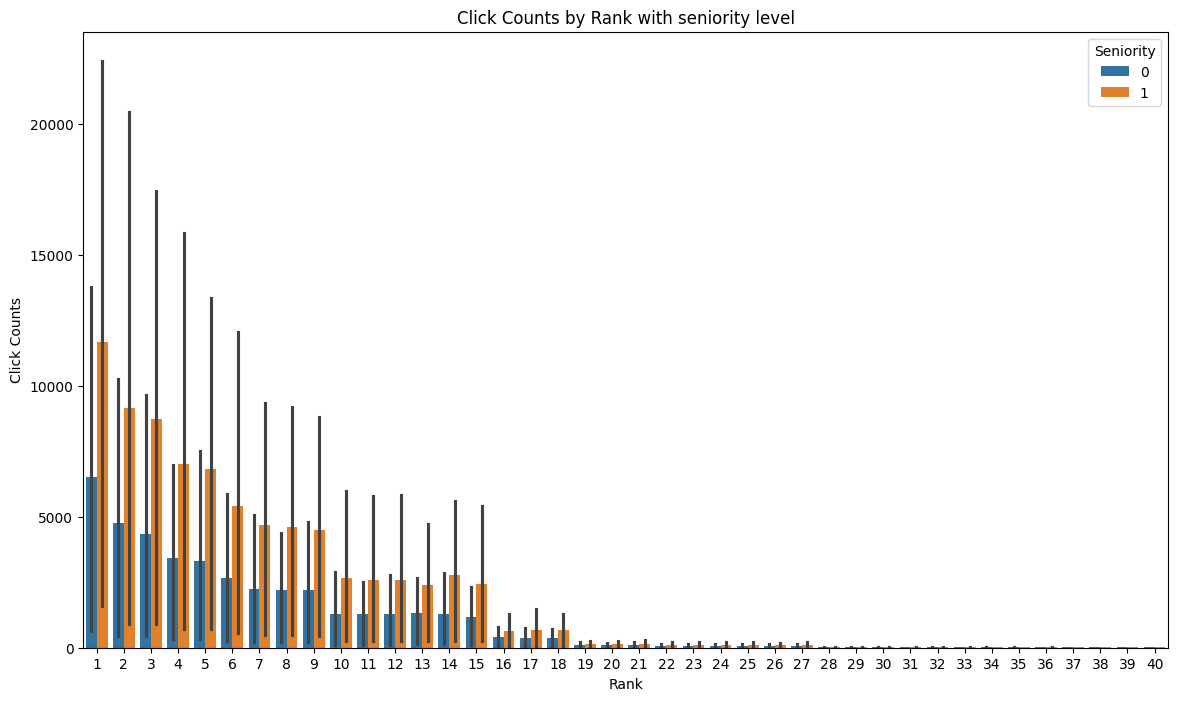

In [52]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='senior',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with seniority level")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Seniority', loc='upper right')

plt.show()

In [53]:
df[df['senior']==1]['senior'].count()

642222

- No matter at what rank, Managerial role is more likely to be clicked than Assistant roles

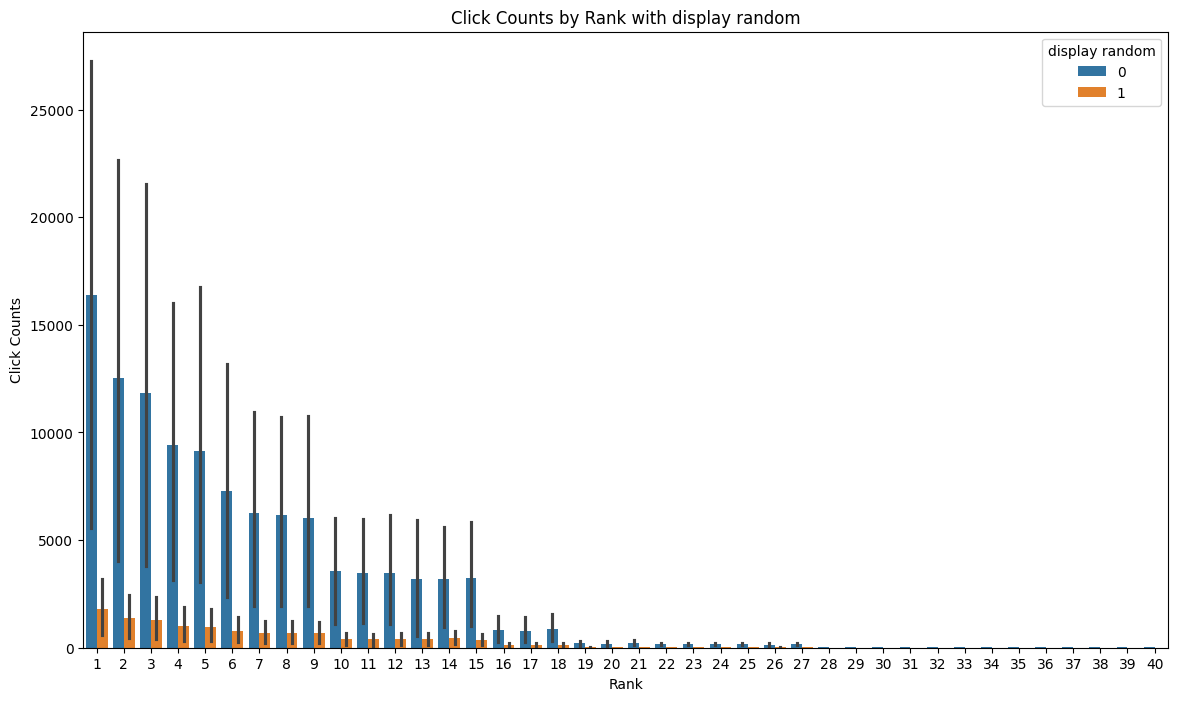

In [54]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='displayrandom',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with display random")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='display random', loc='upper right')

plt.show()

- 


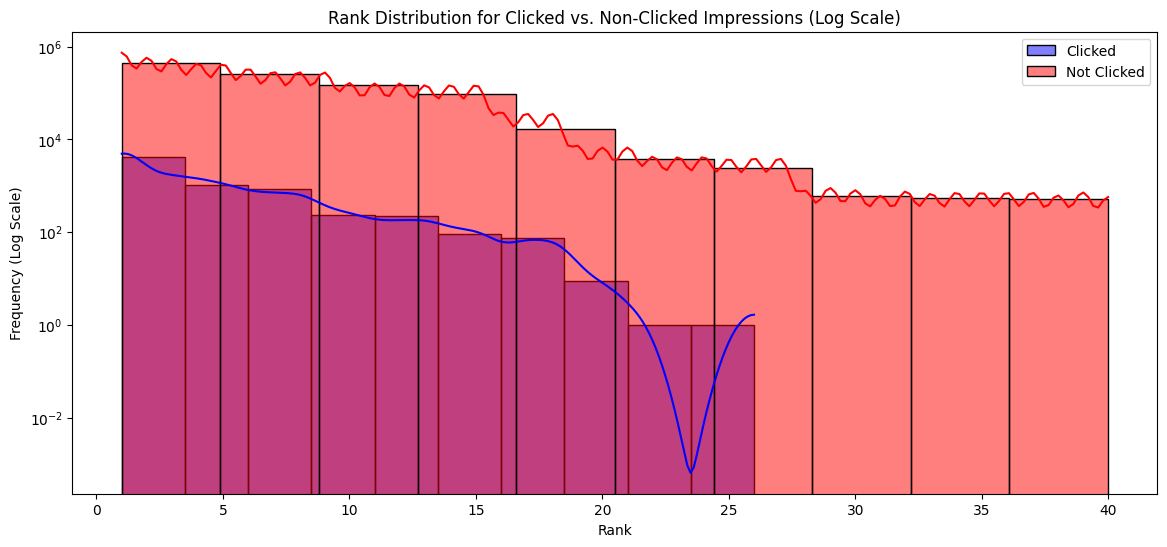

In [55]:
clicked_df = df[df['click'] == 1]
non_clicked_df = df[df['click'] == 0]

plt.figure(figsize=(14, 6))
sns.histplot(clicked_df['rank'], color='blue', kde=True, label='Clicked', bins=10)
sns.histplot(non_clicked_df['rank'], color='red', kde=True, label='Not Clicked', bins=10)
plt.yscale('log')
plt.title("Rank Distribution for Clicked vs. Non-Clicked Impressions (Log Scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency (Log Scale)")
plt.legend()
plt.show()

### New Analysis

In [56]:
product_ctr = df.groupby('product_id')['click'].mean().reset_index()
product_ctr.rename(columns={'click': 'click_through_rate'}, inplace=True)

top_products = product_ctr.sort_values('click_through_rate', ascending=False)


In [57]:
top_products

,product_id,click_through_rate
16760,18668,1.0
54694,60859,1.0
15860,17670,1.0
37546,41684,1.0
24246,26959,1.0
...,...,...
19231,21412,0.0
19232,21413,0.0
19233,21415,0.0
19234,21416,0.0


In [58]:
# product_ctr = df.groupby('product_id')['click'].mean().reset_index()
# product_ctr.rename(columns={'click': 'click_through_rate'}, inplace=True)

def categorize_ctr(ctr):
    if ctr <= 0.25:
        return 'Low CTR (0-0.25)'
    elif ctr <= 0.50:
        return 'Medium CTR (0.25-0.50)'
    elif ctr <= 0.75:
        return 'High CTR (0.50-0.75)'
    else:
        return 'Very High CTR (0.75-1.0)'

product_ctr['CTR_Bucket'] = product_ctr['click_through_rate'].apply(categorize_ctr)

df_with_ctr = df.merge(product_ctr[['product_id', 'CTR_Bucket']], on='product_id')

plt.figure(figsize=(12, 8))



bucket_summary = df_with_ctr.groupby('CTR_Bucket')['rank'].describe()
print(bucket_summary)


                             count      mean       std  min  25%  50%  75%   
CTR_Bucket                                                                   
High CTR (0.50-0.75)          26.0  1.653846  2.226069  1.0  1.0  1.0  1.0  \
Low CTR (0-0.25)          964174.0  6.173600  4.751067  1.0  2.0  5.0  9.0   
Medium CTR (0.25-0.50)       713.0  3.746143  4.074629  1.0  1.0  2.0  5.0   
Very High CTR (0.75-1.0)      90.0  1.944444  1.962348  1.0  1.0  1.0  2.0   

                           max  
CTR_Bucket                      
High CTR (0.50-0.75)      12.0  
Low CTR (0-0.25)          40.0  
Medium CTR (0.25-0.50)    26.0  
Very High CTR (0.75-1.0)  13.0  


<Figure size 1200x800 with 0 Axes>

C:\Users\2502h\AppData\Local\Temp\ipykernel_21424\3975246738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='click', y='rank', palette='viridis', showmeans=True)


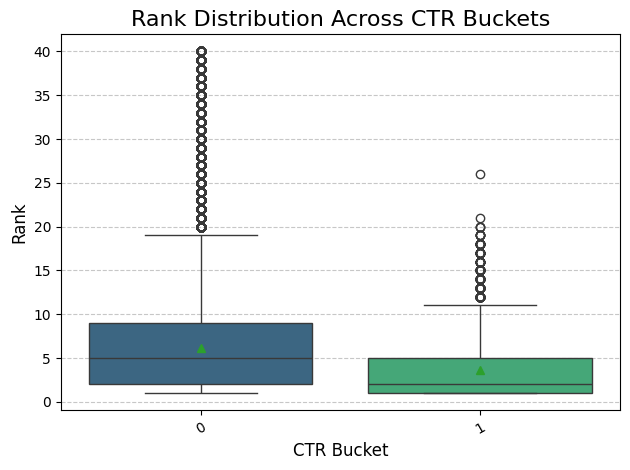

In [59]:
sns.boxplot(data=df, x='click', y='rank', palette='viridis', showmeans=True)
plt.title('Rank Distribution Across CTR Buckets', fontsize=16)
plt.xlabel('CTR Bucket', fontsize=12)
plt.ylabel('Rank', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [60]:
df[(df['click'] == 1) & (df['rank'] > 10)].shape



(396, 56)

In [61]:
df.shape

(965003, 56)

Top Products based on Rank and Click Count:
       product_id  average_rank  median_rank  click_count  normalized_rank   
34594       38418      4.104760          3.0          108         0.105250  \
12857       14300      4.380092          3.0           41         0.112310   
10044       11182      4.902103          4.0           25         0.125695   
30025       33343      5.120737          4.0           23         0.131301   
9835        10948      5.293033          4.0           23         0.135719   
44968       49963      6.478867          5.0           26         0.166125   
7565         8419      6.119890          5.0           24         0.156920   
31011       34435      5.402985          4.0           21         0.138538   
47701       53067      5.366135          4.0           19         0.137593   
10283       11442      5.743104          5.0           20         0.147259   

       normalized_clicks  composite_score  
34594           1.000000         0.894750  
12857    

C:\Users\2502h\AppData\Local\Temp\ipykernel_24100\2355488678.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


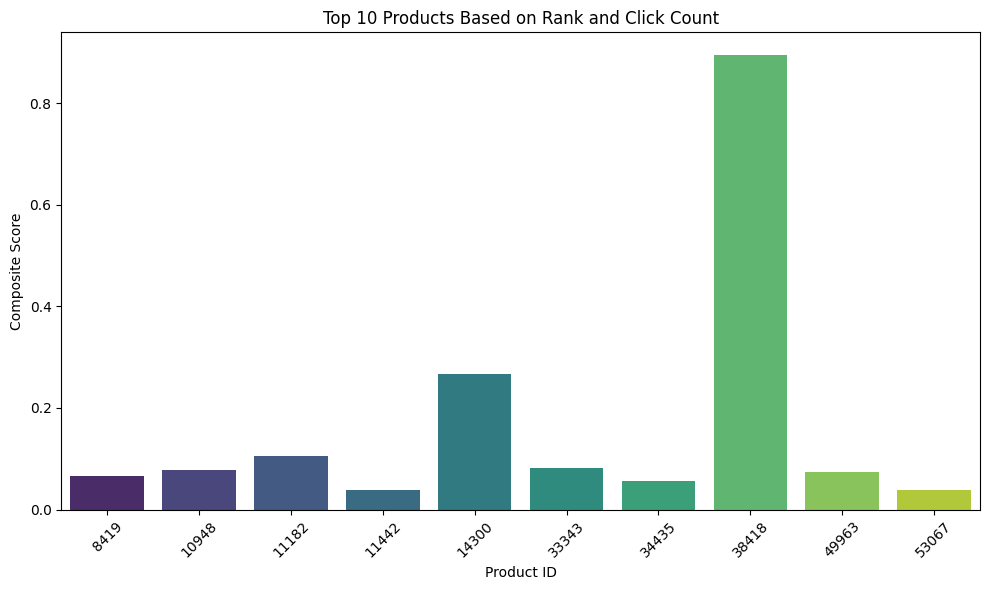

In [16]:
# Step 1: Calculate CTR (Click Through Rate) and median rank for each product
product_performance = df.groupby('product_id').agg(
    average_rank=('rank', 'mean'),   # Average rank across all rows for each product
    median_rank=('rank', 'median'), # Median rank for each product
    click_count=('click', 'sum')    # Total clicks for each product
).reset_index()

# Step 2: Define "best" products criteria: High rank (lower values are better) and high click count
# Normalize the values for better comparison
product_performance['normalized_rank'] = product_performance['average_rank'] / product_performance['average_rank'].max()
product_performance['normalized_clicks'] = product_performance['click_count'] / product_performance['click_count'].max()

# Composite score: Higher clicks and lower ranks
product_performance['composite_score'] = (
    product_performance['normalized_clicks'] - product_performance['normalized_rank']
)

# Step 3: Sort by composite score in descending order
top_products = product_performance.sort_values(by='composite_score', ascending=False)

# Step 4: Display top products
print("Top Products based on Rank and Click Count:")
print(top_products.head(10))  # Top 10 products

# Optional: Visualize the top products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products.head(10),
    x='product_id',
    y='composite_score',
    palette='viridis'
)
plt.title('Top 10 Products Based on Rank and Click Count')
plt.xlabel('Product ID')
plt.ylabel('Composite Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
top_products.sort_values(by=['click_count'],ascending=False)

,product_id,average_rank,median_rank,click_count,normalized_rank,normalized_clicks,composite_score
34594,38418,4.104760,3.0,108,0.105250,1.000000,0.894750
12857,14300,4.380092,3.0,41,0.112310,0.379630,0.267320
44968,49963,6.478867,5.0,26,0.166125,0.240741,0.074616
10044,11182,4.902103,4.0,25,0.125695,0.231481,0.105787
7565,8419,6.119890,5.0,24,0.156920,0.222222,0.065302
...,...,...,...,...,...,...,...
26361,29311,4.666667,3.0,0,0.119658,0.000000,-0.119658
51580,57379,4.666667,3.0,0,0.119658,0.000000,-0.119658
32310,35872,4.666667,6.0,0,0.119658,0.000000,-0.119658
43681,48515,4.666667,2.0,0,0.119658,0.000000,-0.119658


Top Products based on Rank and Click Count:


C:\Users\2502h\AppData\Local\Temp\ipykernel_24100\492380818.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


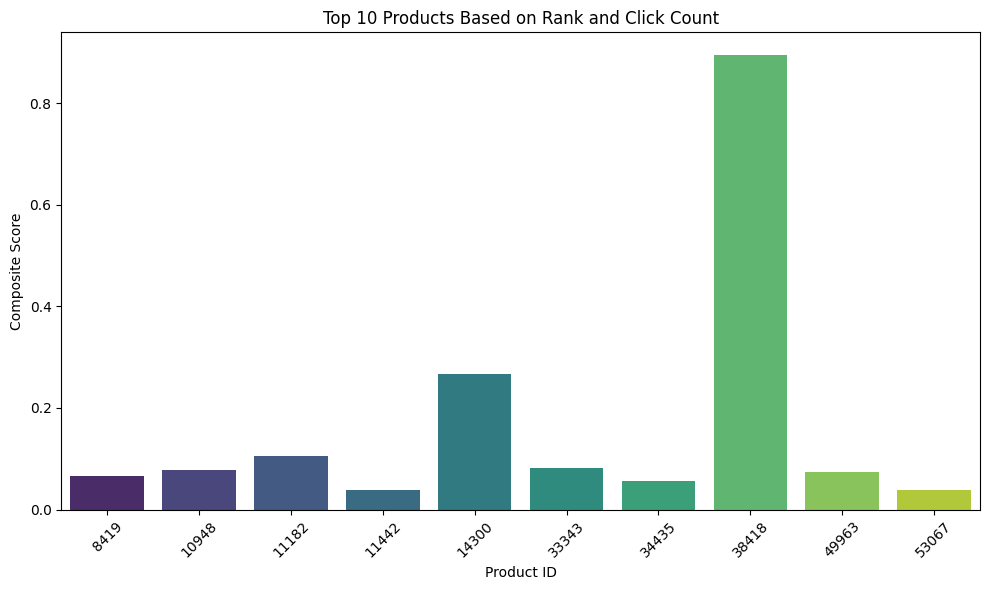

In [20]:
# Step 1: Calculate CTR (Click Through Rate) for each product
product_performance = df.groupby('product_id').agg(
    average_rank=('rank', 'mean'),  # Average rank across all rows for each product
    click_count=('click', 'sum')   # Total clicks for each product
).reset_index()

# Step 2: Define "best" products criteria: High rank (lower values are better) and high click count
# Normalize the values for better comparison
product_performance['normalized_rank'] = product_performance['average_rank'] / product_performance['average_rank'].max()
product_performance['normalized_clicks'] = product_performance['click_count'] / product_performance['click_count'].max()


# Composite score: Higher clicks and lower ranks
product_performance['composite_score'] = (
    product_performance['normalized_clicks'] - product_performance['normalized_rank']
)

# Step 3: Sort by composite score in descending order
top_products = product_performance.sort_values(by='composite_score', ascending=False)

# Step 4: Display top products
print("Top Products based on Rank and Click Count:")
print(top_products.head(10))  # Top 10 products

# Optional: Visualize the top products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products.head(10),
    x='product_id',
    y='composite_score',
    palette='viridis'
)
plt.title('Top 10 Products Based on Rank and Click Count')
plt.xlabel('Product ID')
plt.ylabel('Composite Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
top_products

,product_id,average_rank,click_count,normalized_rank,normalized_clicks,composite_score
34594,38418,4.104760,108,0.105250,1.000000,0.894750
12857,14300,4.380092,41,0.112310,0.379630,0.267320
10044,11182,4.902103,25,0.125695,0.231481,0.105787
30025,33343,5.120737,23,0.131301,0.212963,0.081662
9835,10948,5.293033,23,0.135719,0.212963,0.077244
...,...,...,...,...,...,...
49362,54905,33.000000,0,0.846154,0.000000,-0.846154
25621,28489,35.000000,0,0.897436,0.000000,-0.897436
33358,37047,36.000000,0,0.923077,0.000000,-0.923077
11011,12251,39.000000,0,1.000000,0.000000,-1.000000


### For each user

In [64]:
# Group data by user_id
user_stats = df.groupby('user_id').agg(
    total_impressions=('impression_id', 'count'),  # Total impressions (count of impression_id)
    total_products_shown=('product_id', 'count'), # Total products shown
    total_clicks=('click', 'sum')                 # Total clicks (sum of click values)
).reset_index()

# Calculate Click-Through Rate (CTR)
user_stats['click_through_rate'] = user_stats['total_clicks'] / user_stats['total_impressions']




In [77]:
user_stats.sort_values(by=['total_products_shown'], ascending=False)

,user_id,total_impressions,total_products_shown,total_clicks,click_through_rate
25607,27365,4805,4805,4,0.000832
17732,18966,3872,3872,80,0.020661
23698,25328,3636,3636,0,0.000000
14583,15586,3154,3154,0,0.000000
29258,31269,2997,2997,5,0.001668
...,...,...,...,...,...
14102,15068,1,1,0,0.000000
14113,15082,1,1,0,0.000000
14114,15083,1,1,0,0.000000
14122,15091,1,1,0,0.000000


In [66]:
user_stats.sort_values(by=['click_through_rate', 'total_products_shown'], ascending=False)

,user_id,total_impressions,total_products_shown,total_clicks,click_through_rate
25321,27059,11,11,11,1.0
1732,1853,5,5,5,1.0
14926,15955,3,3,3,1.0
16382,17517,3,3,3,1.0
5006,5336,2,2,2,1.0
...,...,...,...,...,...
29813,31870,1,1,0,0.0
29814,31871,1,1,0,0.0
29815,31872,1,1,0,0.0
29820,31877,1,1,0,0.0


In [67]:
user_stats[user_stats['total_impressions']!=user_stats['total_products_shown']].count()

user_id                 0
total_impressions       0
total_products_shown    0
total_clicks            0
click_through_rate      0
dtype: int64

A user is shown only 1 product in 1 impression, because there are no **NULL** values

In [68]:
user_stats[user_stats['click_through_rate']==1].count()

user_id                 145
total_impressions       145
total_products_shown    145
total_clicks            145
click_through_rate      145
dtype: int64

In [69]:
user_stats[user_stats['click_through_rate']==0].count()

user_id                 27272
total_impressions       27272
total_products_shown    27272
total_clicks            27272
click_through_rate      27272
dtype: int64

In [70]:
user_stats[user_stats['click_through_rate']!=0].count()

user_id                 2551
total_impressions       2551
total_products_shown    2551
total_clicks            2551
click_through_rate      2551
dtype: int64

In [71]:
user_stats['click_through_rate'].describe()

count    29823.000000
mean         0.010973
std          0.079662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: click_through_rate, dtype: float64

### For each impressions

In [72]:
impression_stats = df.groupby('impression_id').agg(
    total_users=('user_id', 'count'),  # Total users (count of user_id)
    total_products_shown=('product_id', 'count'), # Total products shown
    total_clicks=('click', 'sum')                 # Total clicks (sum of click values)
).reset_index()

In [73]:
impression_stats

,impression_id,total_users,total_products_shown,total_clicks
0,0,1,1,0
1,1,1,1,0
2,2,11,11,0
3,3,1,1,0
4,4,3,3,0
...,...,...,...,...
218273,246356,1,1,0
218274,246357,4,4,0
218275,246358,8,8,0
218276,246359,2,2,0


In [74]:
impression_stats.sort_values(by=['total_users', 'total_products_shown'], ascending=False)

,impression_id,total_users,total_products_shown,total_clicks
49207,59101,58,58,0
183458,207822,57,57,0
49206,59100,56,56,0
131928,150765,56,56,0
95060,110319,55,55,0
...,...,...,...,...
218253,246332,1,1,0
218254,246334,1,1,0
218264,246345,1,1,0
218270,246351,1,1,0


In [75]:
impression_stats.describe()

,impression_id,total_users,total_products_shown,total_clicks
count,218278.000000,218278.000000,218278.000000,218278.000000
mean,125324.948020,4.420982,4.420982,0.030878
std,70187.553684,3.955695,3.955695,0.189010
min,0.000000,1.000000,1.000000,0.000000
25%,65232.250000,1.000000,1.000000,0.000000
50%,125707.500000,3.000000,3.000000,0.000000
75%,186123.750000,6.000000,6.000000,0.000000
max,246360.000000,58.000000,58.000000,4.000000


In [76]:
impression_stats[impression_stats['total_users']!=impression_stats['total_products_shown']].count()

impression_id           0
total_users             0
total_products_shown    0
total_clicks            0
dtype: int64